## P2. Normalized model

Pascal P.  
Mar 2020  

- Course: *Introduction to Deep Learning & Neural Networks with Keras*
- Final Project: Build a Regression Model in Keras - Part 2 Normalized Model
<hr />

<hr />

####  Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

<hr />

### 1.1. Download, load and clean the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df_concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

df_concrete_data = pd.read_csv("./concrete_data.csv")
df_concrete_data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [3]:
# Any null value?
df_concrete_data.isnull().sum()

# ... No, good. 

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### 1.2. Split data into predictors and target

In [4]:
## Exclude columns 'Age', 'Strength' for predictors
df_predictors = df_concrete_data[df_concrete_data.columns.difference(['Age', 'Strength'])]

df_target = df_concrete_data['Strength']

### 1.3. Normalizing

In [5]:
df_predictors_norm = (df_predictors - df_predictors.mean()) / df_predictors.std()
df_predictors_norm.head()

,Blast Furnace Slag,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water
0,-0.856472,2.476712,0.862735,-1.217079,-0.846733,-0.620147,-0.916319
1,-0.856472,2.476712,1.055651,-1.217079,-0.846733,-0.620147,-0.916319
2,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
3,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
4,0.678079,-0.790075,0.070492,0.647569,-0.846733,-1.038638,0.488555


In [6]:
n_cols = df_predictors_norm.shape[1]  # == df_predictors
n_cols # number of predictors

7

### 1.4. Build model with keras

In [7]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
## Define regression model as a python function (which we can re-use later)

def regression_model(n_cols, nodes_per_hlayer=[10,], opt='adam', loss='mean_squared_error'):
    ## 1 - Create model
    model = Sequential()
    for ix, num_nodes in enumerate(nodes_per_hlayer):
      if ix == 0: # first layer
        model.add(Dense(num_nodes, activation='relu', input_shape=(n_cols,)))
      else:
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(1)) # output layer
    
    ## 2 - Compile model
    model.compile(optimizer=opt, loss=loss, metrics=[loss])
    return model

In [9]:
from sklearn.model_selection import train_test_split

## Define train/test split wrapper function 

def split_data(df_pred, df_target, test_size=0.3, random_state=6776):
  X_train, X_test, y_train, y_test = train_test_split(df_pred, df_target, 
                                                      test_size=test_size, 
                                                      random_state=random_state)
  return (X_train, X_test, y_train, y_test) # tuple

### 1.5. Instanciate the model

In [10]:
## as per spec n_cols input, 10 nodes in only 1 layer (array of length 1)
model = regression_model(n_cols, nodes_per_hlayer=[10])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


### 1.6. Train and evaluate the model

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
## Main Train/Eval loop - 50 iterations

N = 50
mse_ary = []

for ix in range(0, N): 
  ## Reset model => reset the weigths
  model = regression_model(n_cols, nodes_per_hlayer=[10])
  
  ## Split the data into train and test set using opur wrapper function
  X_train, X_test, y_train, y_test = split_data(df_predictors_norm, df_target)

  ## Fit the model - No train/validation split
  _history = model.fit(X_train, y_train, 
                       epochs=50, 
                       verbose=0)
    
  ## Make Predictions
  pred = model.predict(X_test)
  
  ## Compare to ground truth
  mse = mean_squared_error(y_test, pred)
  print("Iteration: {:2d} / MSE: {:1.5f}".format(ix, mse))
  
  ## Keep it for later
  mse_ary.append(mse)

W0322 11:32:16.836442 139797524154176 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iteration:  0 / MSE: 355.93925
Iteration:  1 / MSE: 512.65372
Iteration:  2 / MSE: 416.27805
Iteration:  3 / MSE: 530.62025
Iteration:  4 / MSE: 369.47872
Iteration:  5 / MSE: 390.52455
Iteration:  6 / MSE: 360.31357
Iteration:  7 / MSE: 302.59599
Iteration:  8 / MSE: 672.30400
Iteration:  9 / MSE: 338.96442
Iteration: 10 / MSE: 599.79051
Iteration: 11 / MSE: 371.22198
Iteration: 12 / MSE: 347.89716
Iteration: 13 / MSE: 284.24522
Iteration: 14 / MSE: 504.95911
Iteration: 15 / MSE: 341.22869
Iteration: 16 / MSE: 404.12333
Iteration: 17 / MSE: 299.67112
Iteration: 18 / MSE: 582.35539
Iteration: 19 / MSE: 381.40654
Iteration: 20 / MSE: 350.48430
Iteration: 21 / MSE: 310.79724
Iteration: 22 / MSE: 315.28477
Iteration: 23 / MSE: 313.97797
Iteration: 24 / MSE: 360.76740
Iteration: 25 / MSE: 359.62957
Iteration: 26 / MSE: 838.86160
Iteration: 27 / MSE: 444.29777
Iteration: 28 / MSE: 424.73098
Iteration: 29 / MSE: 503.28858
Iteration: 30 / MSE: 371.25142
Iteration: 31 / MSE: 346.90339
Iteratio

In [13]:
## Summary

print("Summary baseline model: ")
np_ary = np.array(mse_ary, dtype=np.float64)

## NOTE: using unbiased std - which means diving by N-1 (where N is the size of sample here 50)
##       just in case, added biased std.
print("mean(MSE): {:2.5f} / unbiased std(MSE): {:2.5f} / biased std(MSE): {:2.5f}"\
      .format(np.mean(np_ary), np.std(np_ary, ddof=1), np.std(np_ary, ddof=0)))

Summary baseline model: 
mean(MSE): 420.36851 / unbiased std(MSE): 121.69352 / biased std(MSE): 120.47044


#### Remarks

- Compare to baseline model, the MSE is *less* (therefore better) for the normalized model.


- Also the spread for the normalized model, as measured by standard deviation, is *less* (less variability) than it is for the baseline model.


- Here normalization does seem to improve the performance in term of:  
  - mean (although not by that much in this case) and 
  - standard deviation.

#### Optional

In [14]:
ix_max = np_ary.argmax()
ix_min = np_ary.argmin()

print("max: {:2.5f} at epoch: {:2d} / min: {:2.5f} at epoch: {:2d}"\
      .format(np_ary[ix_max], ix_max, np_ary[ix_min], ix_min))

max: 838.86160 at epoch: 26 / min: 284.24522 at epoch: 13


In [15]:
df_ = pd.read_csv("./01_baseline_model.csv")

df_['mse_02_norm'] = np_ary
df_.to_csv('02_norm_model.csv', sep=',', encoding='utf-8', index=False)

In [16]:
df_.head()

,mse_01_bl,mse_02_norm
0,208.949511,355.939247
1,210.507436,512.653717
2,190.812754,416.278048
3,206.248697,530.620247
4,189.519537,369.478724


In [17]:
df_.describe()

,mse_01_bl,mse_02_norm
count,50.000000,50.000000
mean,424.129761,420.368508
std,415.684991,121.693519
min,179.674799,284.245219
25%,189.380645,347.151831
50%,225.632202,371.295692
75%,462.052733,465.697787
max,2164.597530,838.861597


Text(0, 0.5, 'MSE')

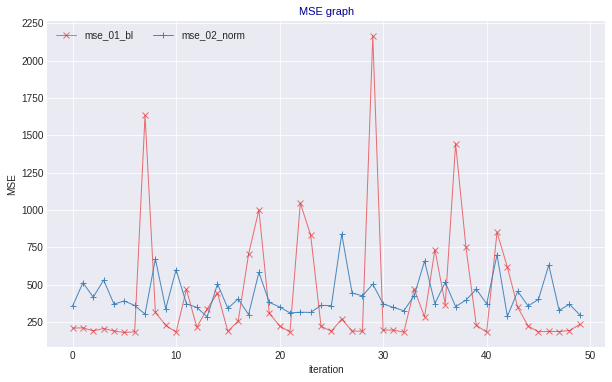

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 6))

# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
ixes = list(range(0, df_.shape[0]))

alpha =0.6
mark='x'
for ix, col in enumerate(df_):
  plt.plot(ixes, df_[col], marker=mark, color=palette(ix), linewidth=1, alpha=alpha, 
              label=df_.columns[ix])
  alpha=0.9
  mark='+'

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("MSE graph", loc='center', fontsize=11, fontweight=0, color='darkblue')
plt.xlabel("iteration")
plt.ylabel("MSE")